In [15]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('whitegrid')

In [2]:
%cd /content/drive/MyDrive/Tenx program/week-2

/content/drive/MyDrive/Tenx program/week-2


In [5]:
df_reviews = pd.read_csv('./data/reviews_analyzed.csv')
df_reviews.head()

,review,rating,date,bank,source,sentiment_label,sentiment_score,clean_review,theme
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,NEGATIVE,0.996465,why dont your atms support accounttoaccount tr...,"Customer Support, Financial Transactions"
1,what is this app problem???,1,2025-06-05,CBE,Google Play,NEGATIVE,0.999623,what is this app problem,Other
2,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,POSITIVE,0.999868,the app is proactive and a good connections,Connectivity Issues
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,CBE,Google Play,NEGATIVE,0.995335,i cannot send to cbebirr app through this app,Financial Transactions
4,good,4,2025-06-05,CBE,Google Play,POSITIVE,0.999816,good,Other


In [7]:
# Group explicitly by bank and theme/sentiment
insights = df_reviews.groupby(['bank', 'sentiment_label', 'theme']).size().reset_index(name='count')
insights.sort_values(by='count', ascending=False).head(10)


,bank,sentiment_label,theme,count
64,CBE,POSITIVE,Other,166
11,BOA,NEGATIVE,Other,143
104,Dashen,POSITIVE,Other,142
33,BOA,POSITIVE,Other,89
48,CBE,NEGATIVE,Other,81
78,Dashen,NEGATIVE,Other,52
8,BOA,NEGATIVE,Feature Requests & Suggestions,15
102,Dashen,POSITIVE,Financial Transactions,12
116,Dashen,POSITIVE,User Interface & Experience,12
10,BOA,NEGATIVE,Financial Transactions,12


In [8]:
# compare banks
df_reviews.groupby('bank')[['rating', 'sentiment_score']].mean()


,rating,sentiment_score
bank,,
BOA,2.727829,0.960350
CBE,4.078125,0.965938
Dashen,4.348083,0.984454


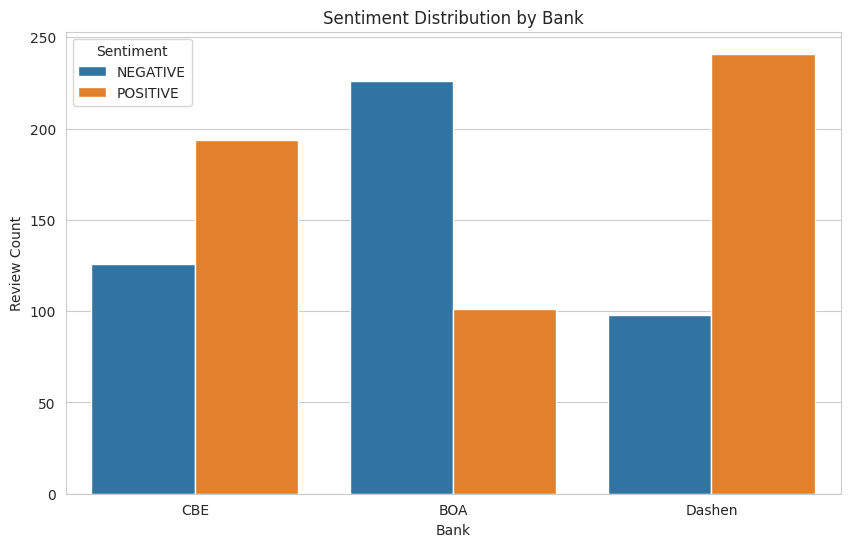

In [10]:
# Sentiment distribution per bank explicitly
plt.figure(figsize=(10,6))
sns.countplot(data=df_reviews, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Review Count')
plt.legend(title='Sentiment')
plt.show()


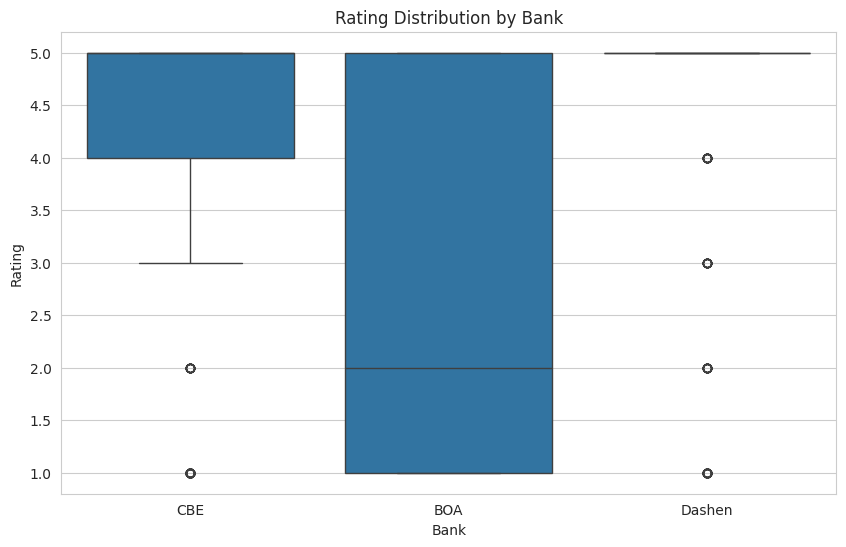

In [12]:
# Rating distribution per bank explicitly
plt.figure(figsize=(10,6))
sns.boxplot(data=df_reviews, x='bank', y='rating')
plt.title('Rating Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Rating')
plt.show()

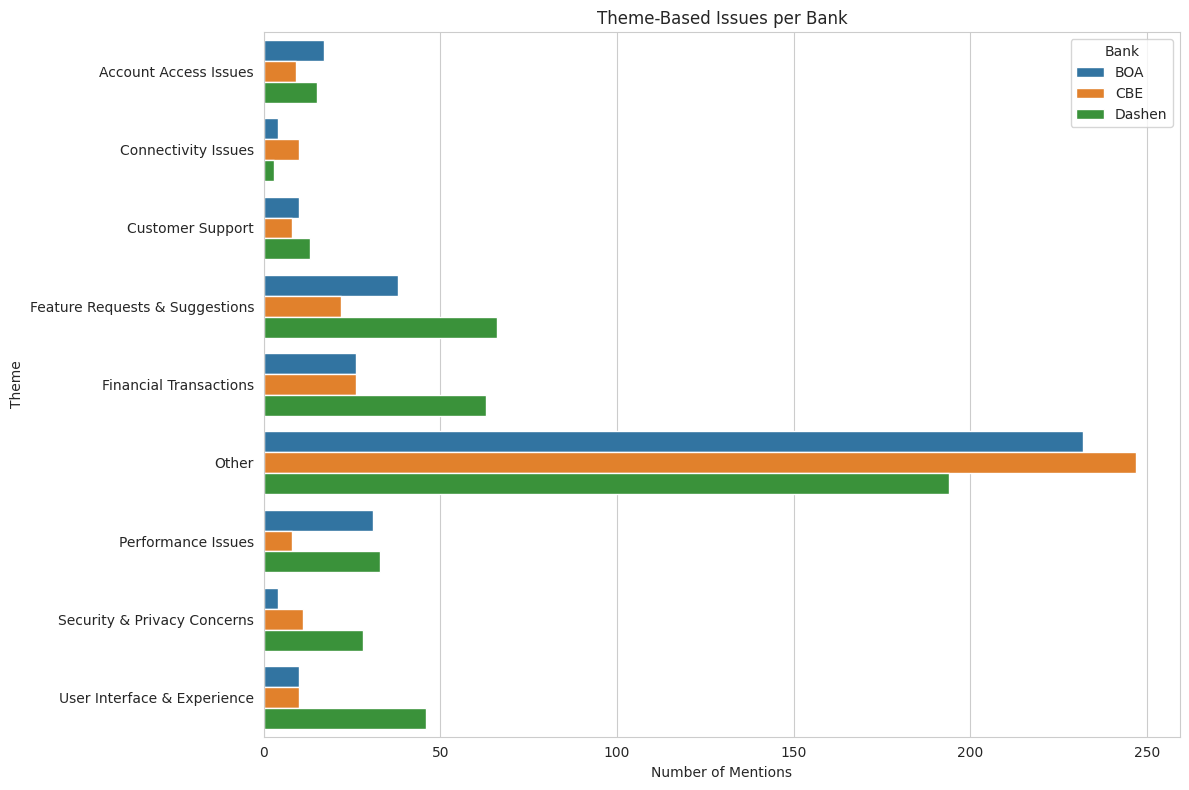

In [17]:
# Explicit Visualization of Theme Issues per Bank
# Ensure themes are not missing explicitly
df_theme_bank = df_reviews[['bank', 'theme']].dropna()

# Split multiple themes explicitly and explode rows
df_theme_bank['theme'] = df_theme_bank['theme'].str.split(',')
df_theme_bank = df_theme_bank.explode('theme')

# Trim whitespace explicitly
df_theme_bank['theme'] = df_theme_bank['theme'].str.strip()

# Count themes per bank explicitly
theme_counts = df_theme_bank.groupby(['bank', 'theme']).size().reset_index(name='count')

# Visualize explicitly
plt.figure(figsize=(12, 8))
sns.barplot(data=theme_counts, x='count', y='theme', hue='bank')

plt.title('Theme-Based Issues per Bank')
plt.xlabel('Number of Mentions')
plt.ylabel('Theme')
plt.legend(title='Bank')
plt.tight_layout()
plt.show()


<ipython-input-21-38725dca5365>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='date', freq='M'),


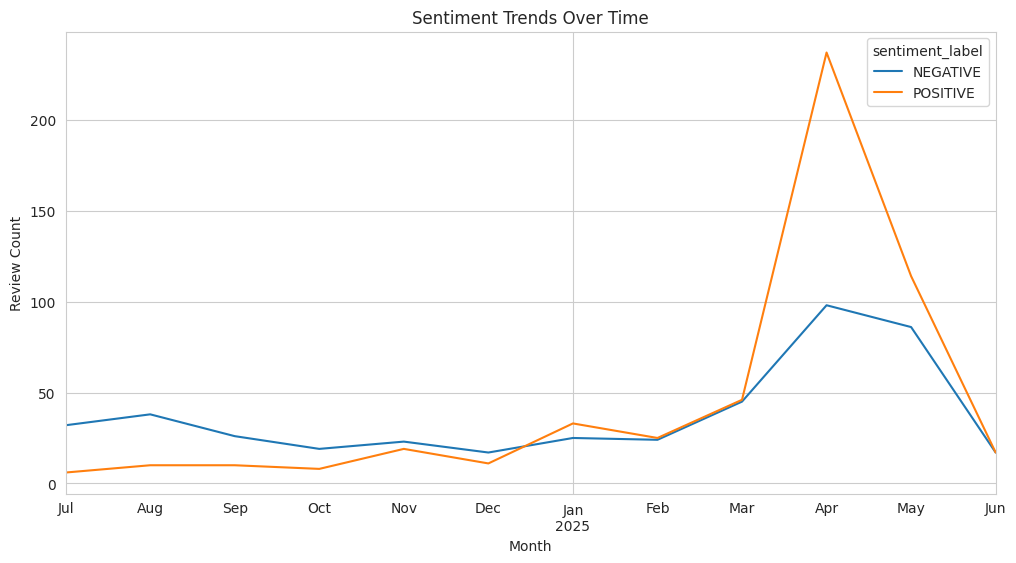

In [21]:
# sentiment trends over time
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

monthly_sentiment = df_reviews.groupby([
    pd.Grouper(key='date', freq='M'),
    'sentiment_label'
]).size().unstack().fillna(0)

monthly_sentiment.plot(figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.show()


<ipython-input-22-afa31e3056c5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='date', freq='M'), 'bank'


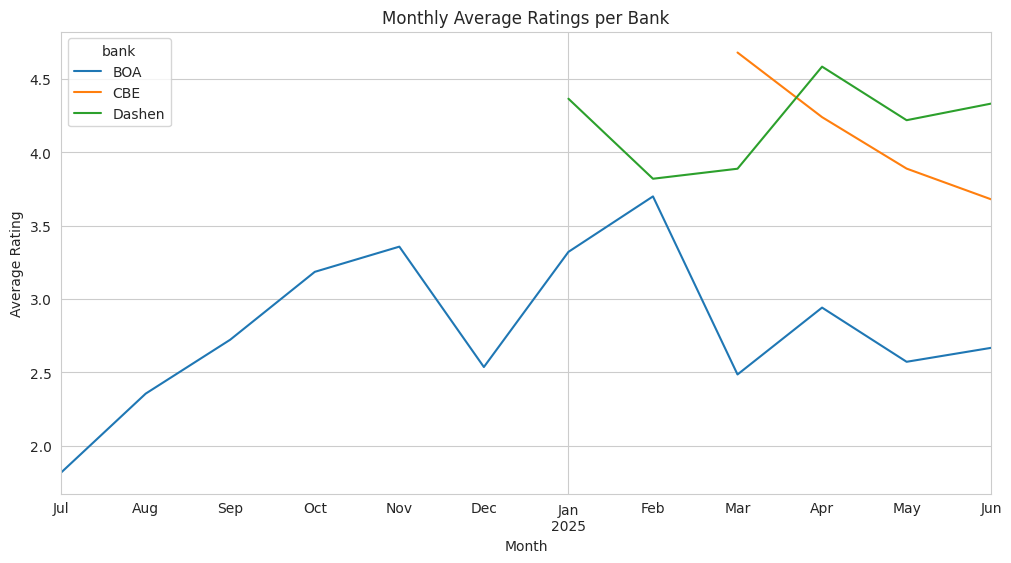

In [22]:
# bank rating over time
monthly_ratings = df_reviews.groupby([
    pd.Grouper(key='date', freq='M'), 'bank'
])['rating'].mean().unstack()

monthly_ratings.plot(figsize=(12, 6))
plt.title('Monthly Average Ratings per Bank')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()


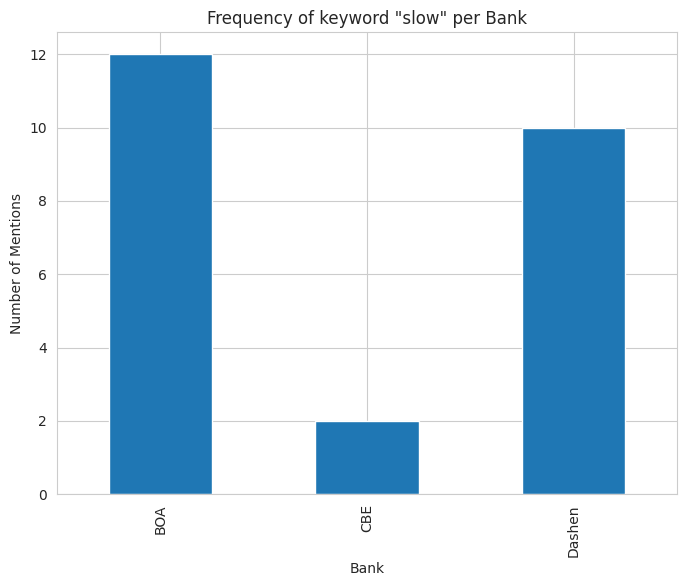

In [23]:
keyword = 'slow'
df_reviews['has_keyword'] = df_reviews['clean_review'].str.contains(keyword, na=False)

keyword_counts = df_reviews.groupby('bank')['has_keyword'].sum()

keyword_counts.plot(kind='bar', figsize=(8, 6))
plt.title(f'Frequency of keyword "{keyword}" per Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Mentions')
plt.show()


In [24]:
#Comparative Analysis of Pain Points and Drivers
pain_points = df_reviews[df_reviews['sentiment_label']=='NEGATIVE'].groupby(['bank', 'theme']).size().nlargest(5)
drivers = df_reviews[df_reviews['sentiment_label']=='POSITIVE'].groupby(['bank', 'theme']).size().nlargest(5)

print("Top 5 Pain Points:\n", pain_points)
print("\nTop 5 Drivers:\n", drivers)


Top 5 Pain Points:
 bank    theme                         
BOA     Other                             143
CBE     Other                              81
Dashen  Other                              52
BOA     Feature Requests & Suggestions     15
        Financial Transactions             12
dtype: int64

Top 5 Drivers:
 bank    theme                      
CBE     Other                          166
Dashen  Other                          142
BOA     Other                           89
Dashen  Financial Transactions          12
        User Interface & Experience     12
dtype: int64


In [29]:
def generate_bank_recommendations(df):
    recommendations = {}

    allowed_themes = [
        'Performance Issues',
        'Account Access Issues',
        'User Interface & Experience',
        'Customer Support',
        'Feature Requests & Suggestions',
        'Connectivity Issues',
        'Financial Transactions',
        'Security & Privacy Concerns'
    ]

    theme_to_recommendation = {
        "Performance Issues": "Technical Improvement: Optimize stability, reduce crashes, and enhance loading times explicitly.",
        "Account Access Issues": "Authentication Enhancement: Improve and streamline login and verification processes explicitly.",
        "User Interface & Experience": "UI Enhancement: Redesign app explicitly to improve navigation and usability.",
        "Customer Support": "Support Improvement: Implement faster response channels explicitly, such as chatbots.",
        "Feature Requests & Suggestions": "Feature Development: Explicitly prioritize user-requested feature enhancements.",
        "Connectivity Issues": "Connectivity Improvement: Optimize network handling explicitly to reduce connectivity issues.",
        "Financial Transactions": "Transaction Enhancement: Clearly ensure reliability and speed in financial transactions explicitly.",
        "Security & Privacy Concerns": "Security Enhancement: Explicitly enhance app security, privacy protocols, and protection measures."
    }

    # Prepare themes explicitly
    df = df[['bank', 'theme']].dropna()
    df['theme'] = df['theme'].str.split(',')
    df = df.explode('theme')
    df['theme'] = df['theme'].str.strip()

    # Explicitly filter themes to only allowed themes
    df_allowed = df[df['theme'].isin(allowed_themes)]

    # Find top allowed theme explicitly per bank
    top_themes = df_allowed.groupby('bank')['theme'].agg(lambda x: x.value_counts().idxmax())

    # Construct explicit recommendations
    for bank, theme in top_themes.items():
        recommendation = theme_to_recommendation.get(theme, "General Improvement: Further analysis explicitly needed.")

        recommendations[bank] = {
            "Top Theme": theme,
            "Recommendation": recommendation
        }

    return recommendations

# Generate explicitly and print recommendations by bank
bank_recommendations = generate_bank_recommendations(df_reviews)

print("\nExplicit Recommendations by Bank (Allowed Themes Only):\n")
for bank, details in bank_recommendations.items():
    print(f"Bank: {bank}")
    print(f"Top Issue: {details['Top Theme']}")
    print(f"Recommendation: {details['Recommendation']}\n")



Explicit Recommendations by Bank (Allowed Themes Only):

Bank: BOA
Top Issue: Feature Requests & Suggestions
Recommendation: Feature Development: Explicitly prioritize user-requested feature enhancements.

Bank: CBE
Top Issue: Financial Transactions
Recommendation: Transaction Enhancement: Clearly ensure reliability and speed in financial transactions explicitly.

Bank: Dashen
Top Issue: Feature Requests & Suggestions
Recommendation: Feature Development: Explicitly prioritize user-requested feature enhancements.



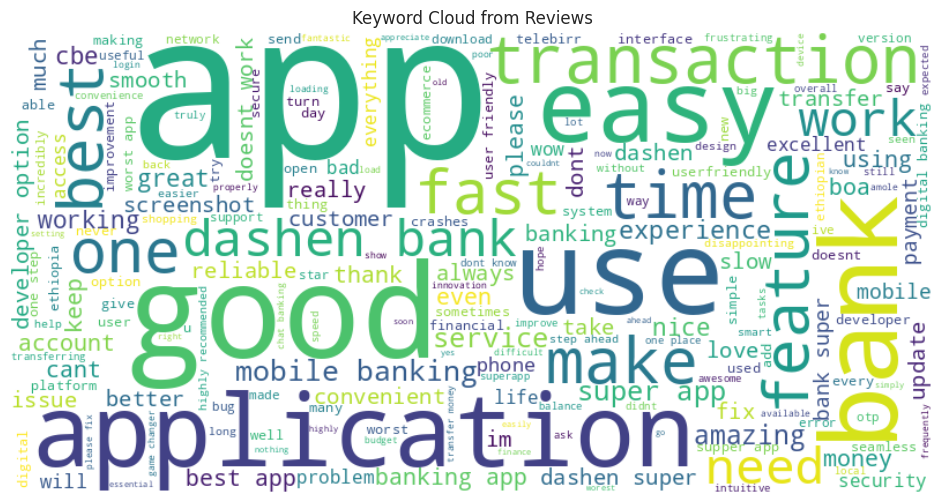

In [16]:
# Keyword Cloud (Wordcloud) explicitly
# Drop missing values explicitly from 'clean_review'
clean_text_series = df_reviews['clean_review'].dropna().astype(str)

# Create a single text explicitly for word cloud
text = " ".join(clean_text_series)

# Generate and plot word cloud explicitly
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Cloud from Reviews')
plt.show()
